# Housing project from A. Geron ML book

 ( See https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb )

Task - use California housing census data to build a model of housing prices in the state

The model should be able to predict the median housing price with the given data

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth': 2})
import pandas as pd
import seaborn as sns

Download the data (using functions in housing_mod)

In [2]:
import os
from housing_mod import *

path = '/Users/ben_mcdermott/Documents/programming/geron-ml/housing/'

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

fetch_housing_data(HOUSING_URL, HOUSING_PATH)

Import the data to pandas dataframe 'housing', and take a look

In [3]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Get info on the dataset and check out some simple statistics

Each row represents one district. Note that total_bedrooms has a small amount of missing data.

In [4]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Look at histograms and potential correlations in the dataset

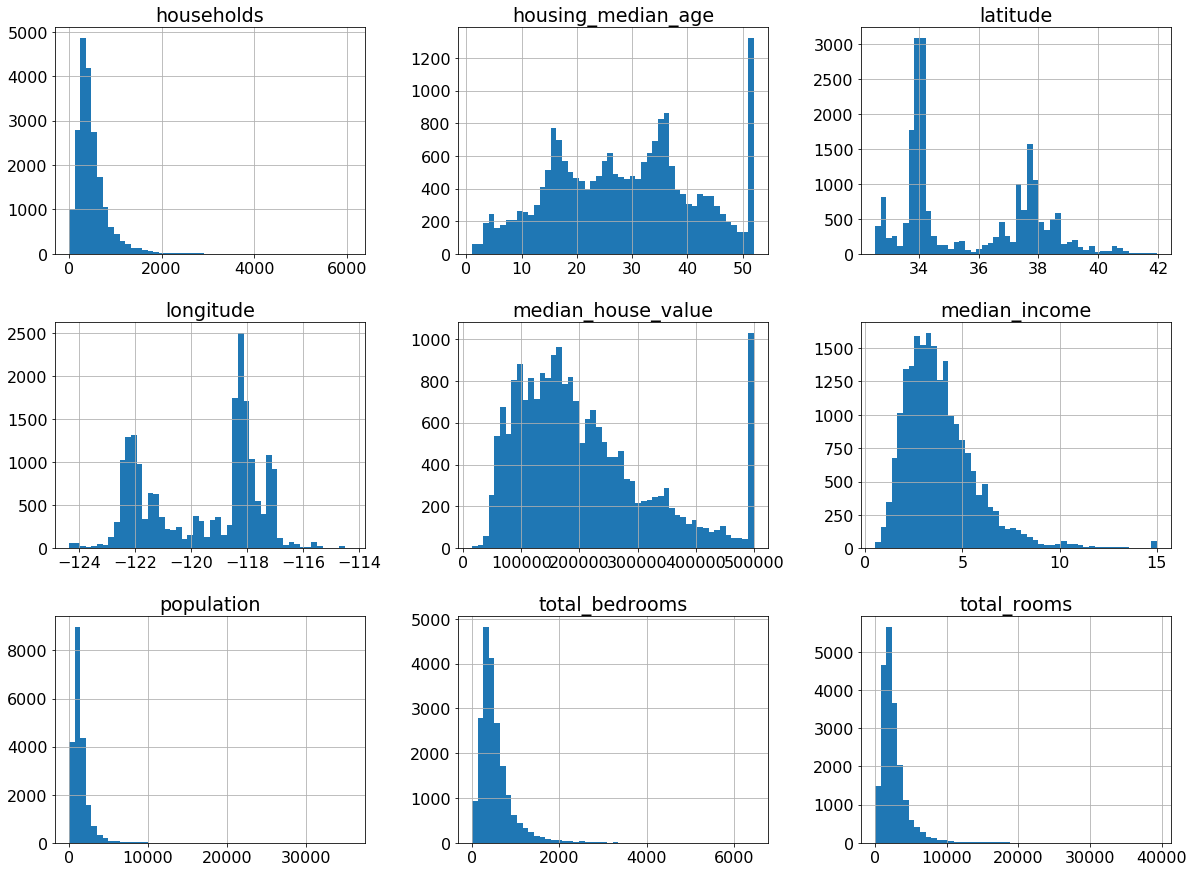

In [5]:
housing.hist(bins=50, figsize=(20,15)) ;
plt.savefig('attribute_histograms.pdf', bbox_inches='tight')

In [6]:
#sns_plot = sns.pairplot(housing)

Split the data into the test and train sets (set the random seed so that the work is reproducible)

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

We may have introduced sampling bias by doing random sampling...
It may be a better idea to utilise stratified sampling based on income categories, as median income is a key indicator

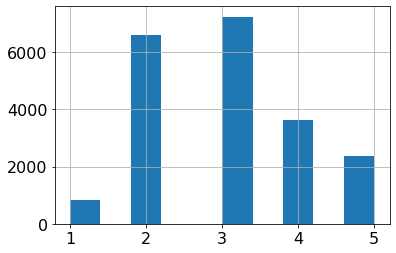

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, 1e6],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

Stratified shuffle split based on the income categories defined above

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for test_index, train_index in split.split(housing, housing["income_cat"]):
    strat_test_set = housing.loc[test_index]
    strat_train_set = housing.loc[train_index]

Check the counts against the full data set

In [11]:
strat_test_set["income_cat"].value_counts() / strat_test_set.shape[0]

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [12]:
housing["income_cat"].value_counts() / housing.shape[0]

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [13]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / data.shape[0]

# give the random test set an income category
test_set["income_cat"] = pd.cut(test_set["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, 1e6],
                               labels=[1, 2, 3, 4, 5])

compare_props = pd.DataFrame({
    "Total": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. % error"] = 100.0 * (compare_props["Random"] / compare_props["Total"]) - 100.0
compare_props["Strat. % error"] = 100.0 * (compare_props["Stratified"] / compare_props["Total"]) - 100.0

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Improved sampling with the stratified shuffle split

In [14]:
compare_props

Total  Stratified    Random  Rand. % error  Strat. % error
1  0.039826    0.039850  0.040213       0.973236        0.060827
2  0.318847    0.318859  0.324370       1.732260        0.003799
3  0.350581    0.350594  0.358527       2.266446        0.003455
4  0.176308    0.176296  0.167393      -5.056334       -0.006870
5  0.114438    0.114402  0.109496      -4.318374       -0.031753

Now drop the income categories from the stratified test and train sets

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore and visualise the training set

In [16]:
housing = strat_train_set.copy()

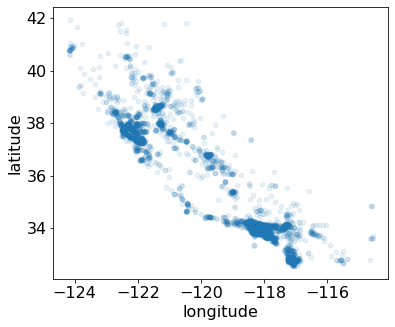

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(6,5))

Get a map of California to plot the data on top of

In [19]:
PROJECT_ROOT_DIR = "."
get_cali_image(PROJECT_ROOT_DIR)

Finished
.


Create a map with data superimposed

In [21]:
import matplotlib.image as mpimg
images_path = PROJECT_ROOT_DIR+'/images/end_to_end_project/'
filename = 'california.png'
cali_img=mpimg.imread(os.path.join(images_path, filename))

So median house value broadly increases with ocean proximity and with population density

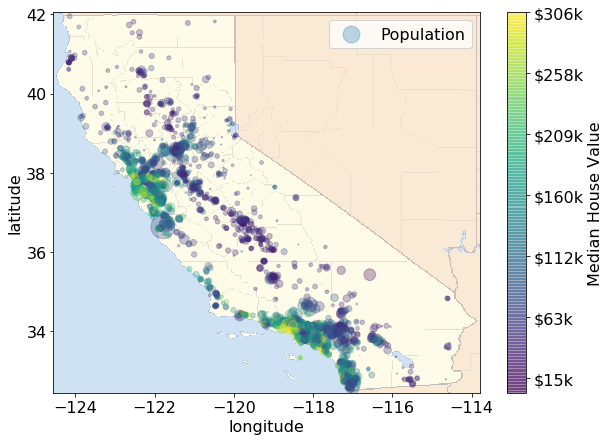

In [44]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/50, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("viridis"),
                       colorbar=False, alpha=0.3,
                      )
plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(1e-3*x)) for x in tick_values])
cbar.set_label('Median House Value', fontsize=16)

plt.savefig('cali_housing_prices_map.png', bbox_inches='tight', dpi=300)

Correlation matrix and correlations with median house value

In [45]:
corr_matrix = housing.corr()

Median house value is strongly positively correlated with median income, and positively correlated with rooms, bedrooms, median house age and households. Negative correlation with latitude due to cheaper housing in northern California.

In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

Pick some promising attributed and look at the pairplot

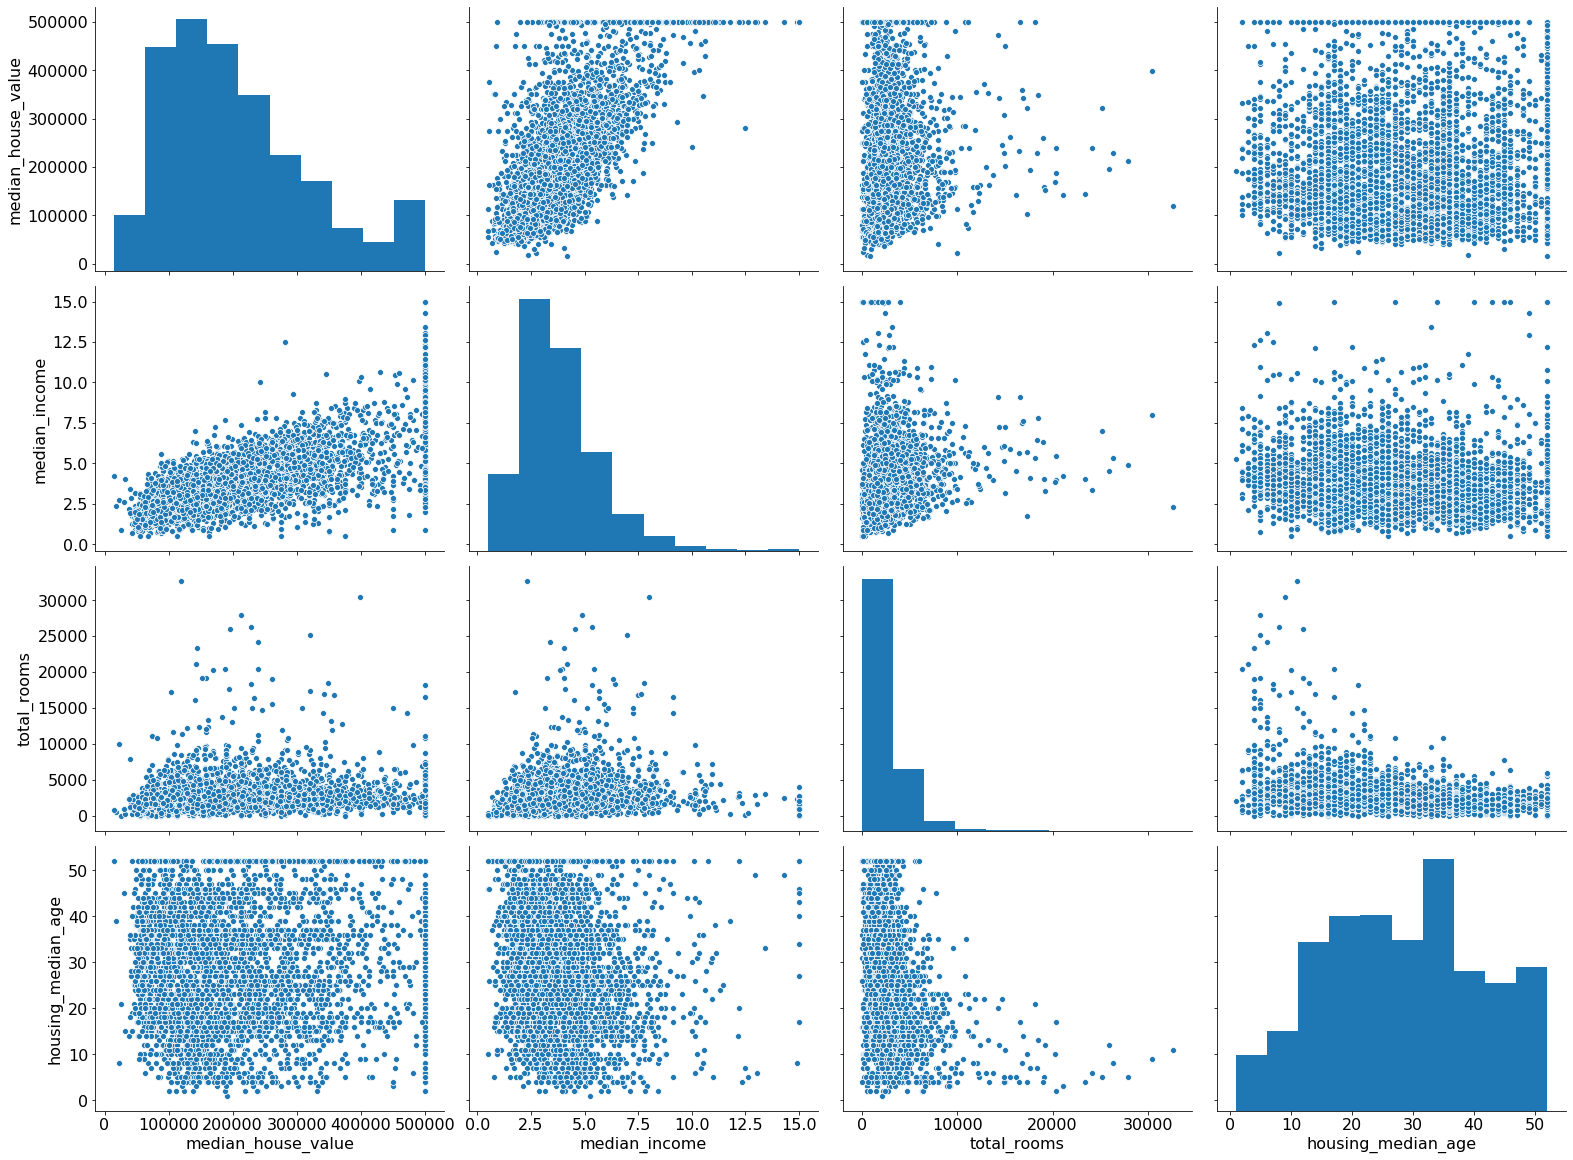

In [60]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(housing[attributes], height=4, aspect=4/3)

Experiment with combining attributes

[0, 16, 0, 550000]

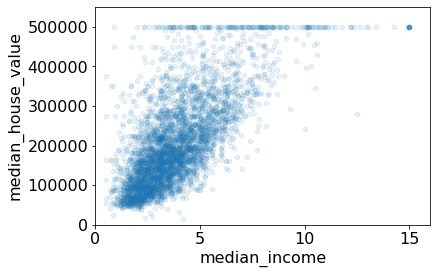

In [62]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])